# EDA

## Intro
This is going to be the EDA of exploring some NHL data from the previous seasons. This data contains all games played in the last 6-8 years. The data analyzed includes shift lengths, goals, assists by team and player. 


## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport

In [3]:
import sys
sys.path.append('..')

In [4]:
from scripts import ProjectFunctions as pf

## Importing Data 
explanation

In [5]:
adress1 = "/Users/vanessadunn/Documents/School/4thYear/Data301/game_shifts.csv"
adress2 = "/Users/vanessadunn/Documents/School/4thYear/Data301/game_skater_stats.csv"

## Cleaning Data

In [6]:
#add in after they work
#df1 = ShiftsCleaning(adress1)
#df2 = StatsCleaning(adress2)

df2 = (pd.read_csv(adress2)
          .drop(['faceoffTaken', 'takeaways', 'giveaways','hits','blocked','faceOffWins','evenTimeOnIce','penaltyMinutes','powerPlayTimeOnIce','shortHandedTimeOnIce'],axis='columns')
          .assign(Goals=lambda adress2:(adress2["goals"]+adress2["powerPlayGoals"]+adress2["shortHandedGoals"]))
          .assign(Assists=lambda adress2:(adress2["assists"]+adress2["powerPlayAssists"]+adress2["shortHandedAssists"]))
          .drop(['goals','assists','powerPlayGoals','powerPlayAssists','shortHandedGoals','shortHandedAssists'], axis='columns')
          )
df3 = (
         pd.read_csv(adress1)
        .assign(shiftlength=lambda adress1:(adress1['shift_end']-adress1['shift_start']))
        )
df1 = (
         df3[(df3['shiftlength']) > 0 ]
        .drop(['period','shift_start','shift_end'], axis='columns')
    )



In [7]:
df1['game_id']=df1['game_id'].values.astype(str)
df1['player_id']=df1['player_id'].values.astype(str)
df1['ID']=df1['game_id'].str.cat(df1['player_id'],sep='-')

df2['game_id']=df2['game_id'].values.astype(str)
df2['player_id']=df2['player_id'].values.astype(str)
df2['ID']=df2['game_id'].str.cat(df2['player_id'],sep='-')
df5 = df2.drop(['game_id','player_id'], axis='columns')

In [8]:
#df3 = GroupingPlayer(df1)
df4 = (
        df1.groupby('ID').mean() #add index later
    )

## Quick overview of Cleaned Data

In [9]:
df4.head()

shiftlength
ID                             
2010020001-8459628    45.966667
2010020001-8462044   504.142857
2010020001-8465200    55.192308
2010020001-8467351    48.739130
2010020001-8467400    46.241379

In [10]:
df5.head()

team_id  timeOnIce  shots  plusMinus  Goals  Assists                  ID
0        4        955      0          1      0        1  2016020045-8468513
1        4       1396      4          0      0        1  2016020045-8476906
2        4        915      1         -1      0        0  2016020045-8474668
3        4       1367      0         -1      0        5  2016020045-8473512
4        4        676      3         -1      0        0  2016020045-8471762

In [11]:
ProfileReport(df4).to_notebook_iframe()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
ProfileReport(df5).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Merging Data Sets

In [13]:
#do the merge
df=pd.merge(df4,df5,how='inner',on ='ID')
df=df[['ID','shiftlength','team_id','shots','Goals','Assists','plusMinus','timeOnIce']]
df

ID  shiftlength  team_id  shots  Goals  Assists  \
0       2010020001-8459628    45.966667        8      0      0        0   
1       2010020001-8465200    55.192308       10      2      0        0   
2       2010020001-8467351    48.739130        8      0      0        0   
3       2010020001-8467400    46.241379       10      1      0        0   
4       2010020001-8467407    50.708333        8      5      0        0   
...                    ...          ...      ...    ...    ...      ...   
544155  2019030416-8480036    51.129032       25      3      0        0   
544156  2019030416-8480186    44.153846       14      0      0        0   
544157  2019030416-8480186    44.153846       14      0      0        0   
544158  2019030416-8481641    35.208333       25      1      0        0   
544159  2019030416-8481641    35.208333       25      1      0        0   

        plusMinus  timeOnIce  
0               0       1379  
1               0       1435  
2               0       1121  
3               0       1341  
4               0       1217  
...           ...        ...  
544155          0       1585  
544156          0        574  
544157          0        574  
544158          0        845  
544159          0        845  

[544160 rows x 8 columns]

In [14]:
df.head()

ID  shiftlength  team_id  shots  Goals  Assists  plusMinus  \
0  2010020001-8459628    45.966667        8      0      0        0          0   
1  2010020001-8465200    55.192308       10      2      0        0          0   
2  2010020001-8467351    48.739130        8      0      0        0          0   
3  2010020001-8467400    46.241379       10      1      0        0          0   
4  2010020001-8467407    50.708333        8      5      0        0          0   

   timeOnIce  
0       1379  
1       1435  
2       1121  
3       1341  
4       1217

In [15]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Graphing Data Set Correlations
From this graph it is obvious that there isnt a large correlation between any of the data. The biggest correlation is between the the shift length and the time spent on ice. This is to be expected as because the shifts lengths in a given game should add to the time on ice. 

<AxesSubplot:>

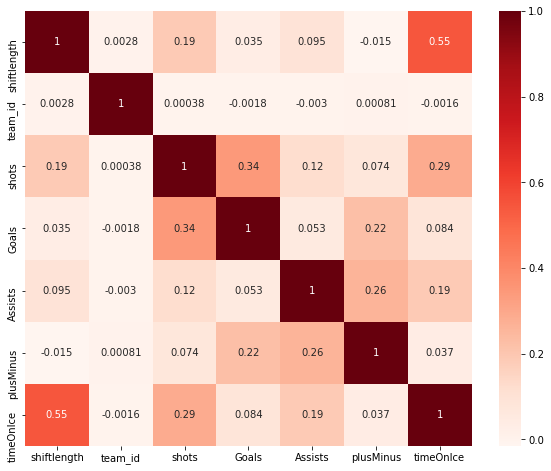

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

## More Graphs and Explanations

<AxesSubplot:xlabel='shiftlength', ylabel='Density'>

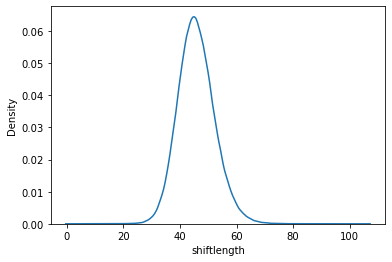

In [17]:
sns.kdeplot(df['shiftlength'])

<AxesSubplot:xlabel='shiftlength', ylabel='team_id'>

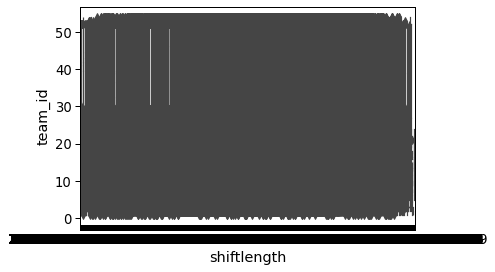

In [28]:
sns.boxplot(data=df,x='shiftlength', y='team_id')

## Seperating out data by team instead of players
Splitting up the data by team IDs in order to make it more manageable to graph

In [18]:
shiftsbyteam = df.groupby(['team_id']).mean().reset_index()
y = shiftsbyteam.round(decimals=2)
y.head()

team_id  shiftlength  shots  Goals  Assists  plusMinus  timeOnIce
0        1        46.35   1.58   0.17     0.29      -0.11     992.18
1        2        47.20   1.68   0.19     0.32      -0.01     998.12
2        3        45.40   1.68   0.19     0.33       0.02     994.02
3        4        44.97   1.72   0.20     0.35      -0.00     991.60
4        5        45.71   1.80   0.22     0.38       0.06     992.23

<AxesSubplot:xlabel='team_id', ylabel='shiftlength'>

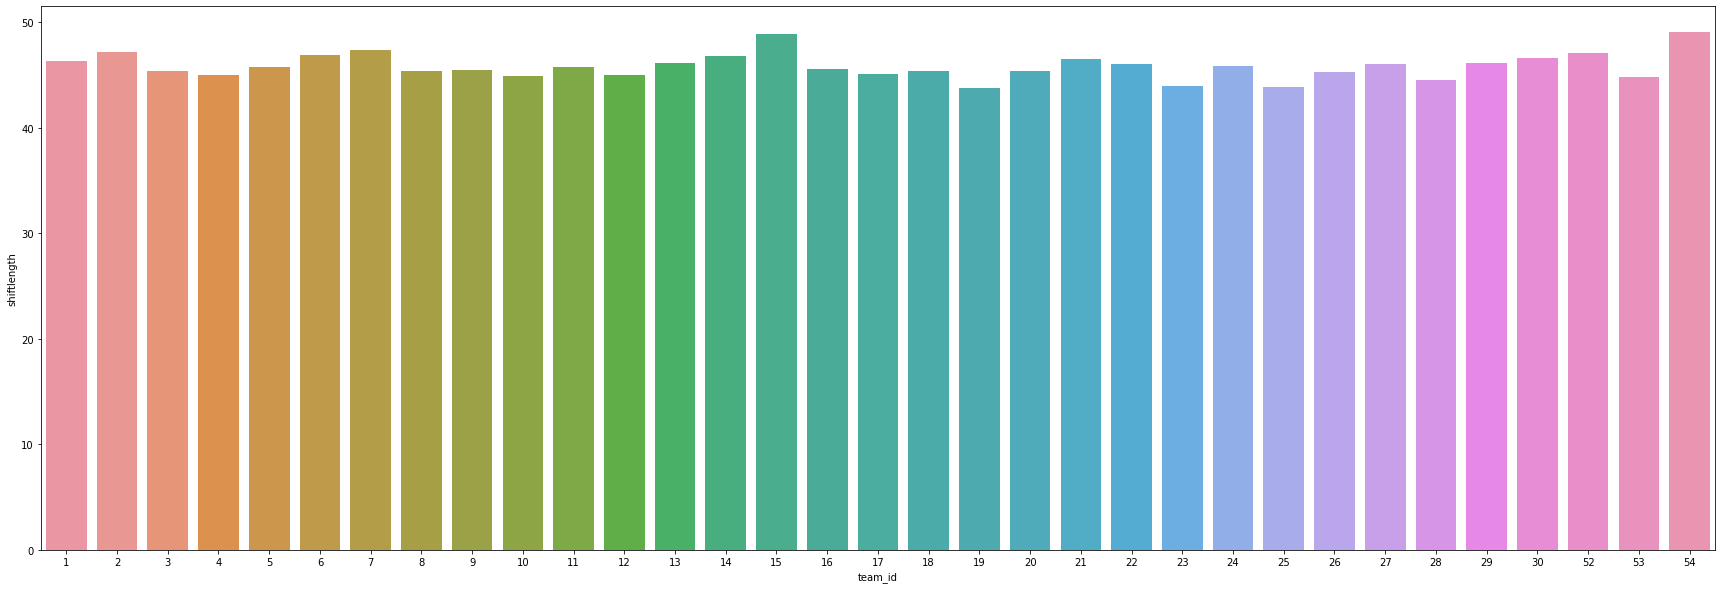

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x='team_id',y='shiftlength',data=shiftsbyteam)

<AxesSubplot:xlabel='team_id', ylabel='Goals'>

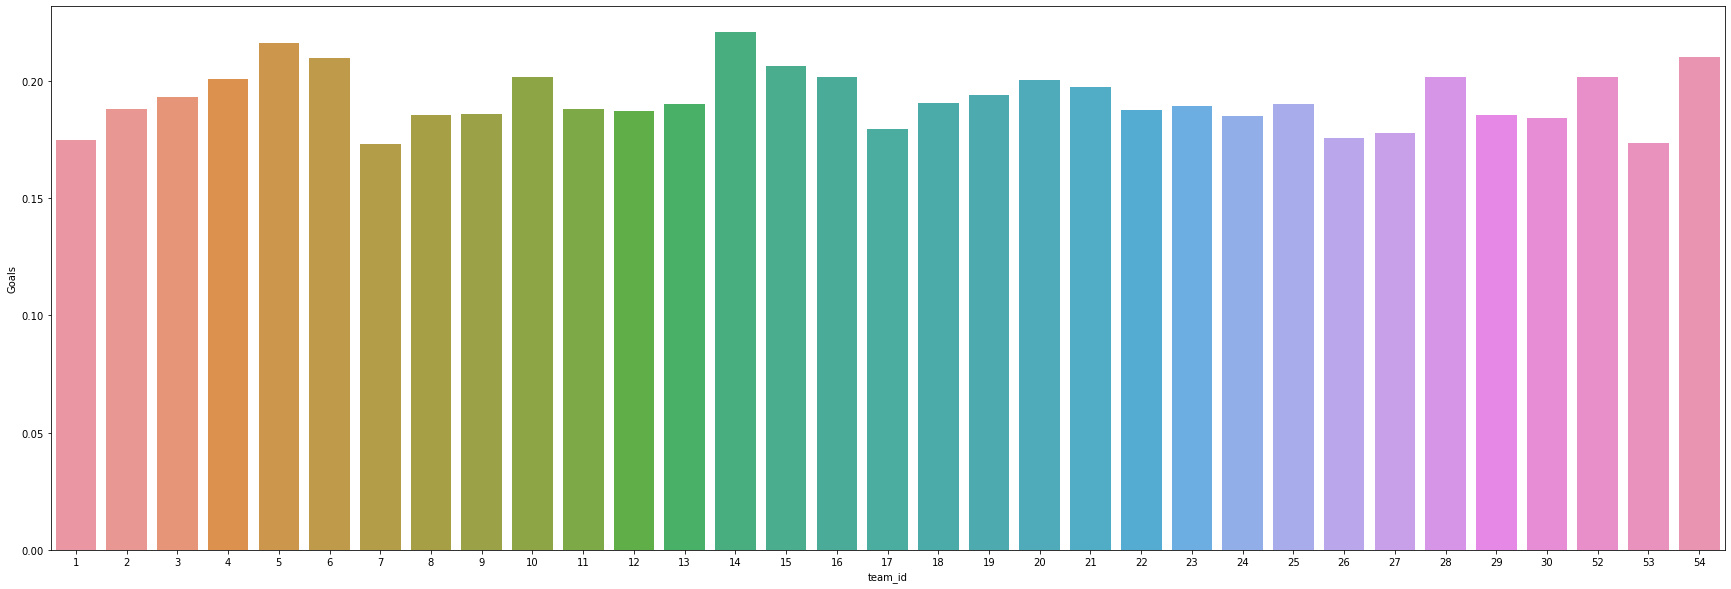

In [20]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x='team_id',y='Goals',data=shiftsbyteam)

<Figure size 576x432 with 0 Axes>

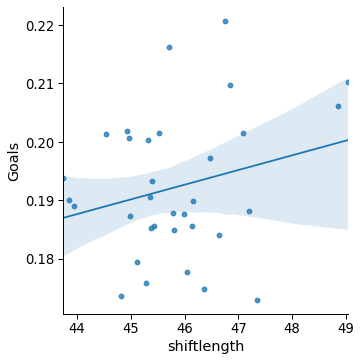

In [21]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)
sns.lmplot(x='shiftlength', y='Goals', data=shiftsbyteam)

<AxesSubplot:>

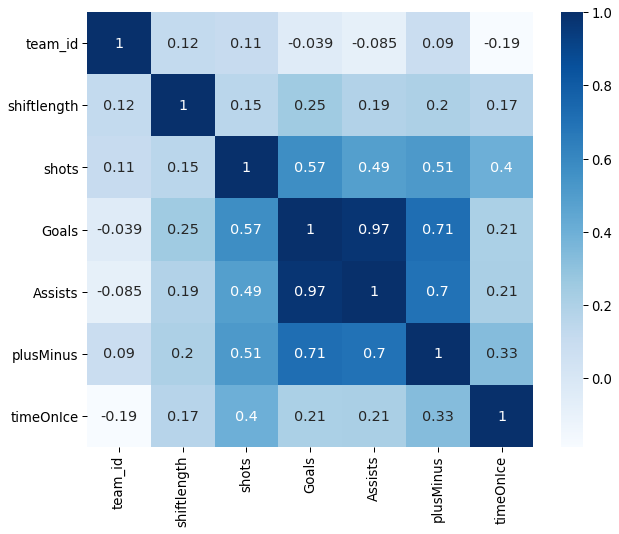

In [22]:
#Do correlation between shift length and goals by team
plt.figure(figsize=(10,8))
sns.heatmap(shiftsbyteam.corr(), annot=True, cmap='Blues')

<Figure size 720x576 with 0 Axes>

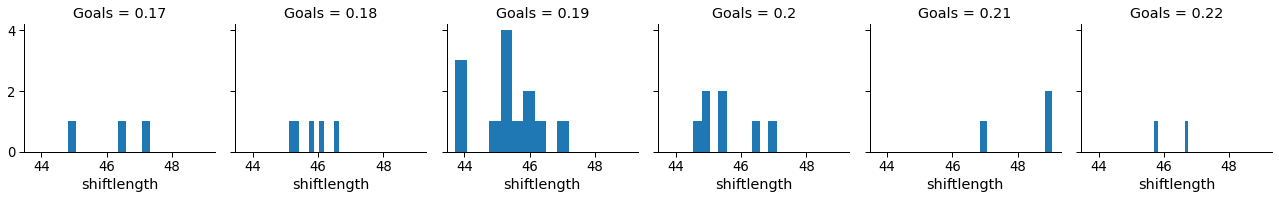

In [23]:
plt.figure(figsize=(10,8))
x = sns.FacetGrid(y, col='Goals')
x.map(plt.hist, 'shiftlength', bins=10)